In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Coursera_reviews.csv
/kaggle/input/Coursera_courses.csv


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Dropout
import tensorflow_hub as hub 

2024-04-17 20:52:08.769905: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-17 20:52:08.770007: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-17 20:52:08.878899: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Dataset of courses:
df_courses = pd.read_csv("/kaggle/input/Coursera_courses.csv")
df_courses.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [3]:
df_courses.shape

(623, 4)

In [5]:
df_reviews = pd.read_csv("/kaggle/input/Coursera_reviews.csv")
df_reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [17]:
df_reviews.shape

(1454711, 5)

In [22]:
df = pd.merge(df_reviews, df_courses[['course_id', 'name']], on='course_id', how='left')
df = df.rename(columns={'name': 'course_name'})
df.head()

,reviews,reviewers,date_reviews,rating,course_id,course_name
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...


In [27]:
df = df[['course_name', 'reviews', 'rating']]
df.head(5)

,course_name,reviews,rating
0,Become a CBRS Certified Professional Installer...,"Pretty dry, but I was able to pass with just t...",4
1,Become a CBRS Certified Professional Installer...,would be a better experience if the video and ...,4
2,Become a CBRS Certified Professional Installer...,Information was perfect! The program itself wa...,4
3,Become a CBRS Certified Professional Installer...,A few grammatical mistakes on test made me do ...,4
4,Become a CBRS Certified Professional Installer...,Excellent course and the training provided was...,4


In [28]:
df.shape

(1454711, 3)

<Axes: xlabel='rating'>

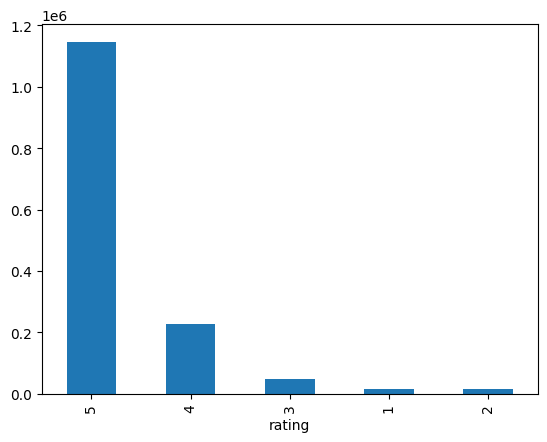

In [29]:
df['rating'].value_counts().plot(kind='bar')

In [30]:
df['rating'].value_counts()

rating
5    1146164
4     226702
3      48303
1      17354
2      16188
Name: count, dtype: int64

In [31]:
df.isna().sum()

course_name      0
reviews        153
rating           0
dtype: int64

In [32]:
df.duplicated().sum()

953703

In [33]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [34]:
df.duplicated().sum(),df.isna().sum()

(0,
 course_name    0
 reviews        0
 rating         0
 dtype: int64)

In [35]:
df['rating'].value_counts()

rating
5    390969
4     79692
3     17633
1      6599
2      6060
Name: count, dtype: int64

In [36]:
value_mapping = {
    1: 'negative',
    2: 'negative',
    3: 'neutral',
    4: 'positive',  
    5: 'positive'   
}

df['rating'] = df['rating'].map(value_mapping)

df.head()

,course_name,reviews,rating
0,Become a CBRS Certified Professional Installer...,"Pretty dry, but I was able to pass with just t...",positive
1,Become a CBRS Certified Professional Installer...,would be a better experience if the video and ...,positive
2,Become a CBRS Certified Professional Installer...,Information was perfect! The program itself wa...,positive
3,Become a CBRS Certified Professional Installer...,A few grammatical mistakes on test made me do ...,positive
4,Become a CBRS Certified Professional Installer...,Excellent course and the training provided was...,positive


In [37]:
df['rating'].value_counts()

rating
positive    470661
neutral      17633
negative     12659
Name: count, dtype: int64

In [42]:
df_neg=df[df['rating']=='negative']
df_neu=df[df['rating']=='neutral'].sample(n=15000)
df_pos=df[df['rating']=='positive'].sample(n=17000)
df_new = pd.concat([df_neg, df_neu, df_pos]).sample(frac = 1).reset_index(drop=True)
df_new.shape

(44659, 3)

In [43]:
def print_class_proportions(labels):
    # Count the occurrences of each class label
    class_counts = labels.value_counts()
    
    # Calculate proportions
    total_samples = len(labels)
    class_proportions = class_counts / total_samples
    
    # Print class proportions
    print("Class Proportions:")
    for class_label, proportion in class_proportions.items():
        print(f"Class {class_label}: {proportion:.2%}")

In [44]:
def visualize_class_proportions(labels):
    # Count the occurrences of each class label
    class_counts = labels.value_counts()
    
    # Calculate proportions
    class_proportions = class_counts / class_counts.sum()
    
    # Plotting
    plt.figure(figsize=(8, 6))
    class_proportions.plot(kind='bar', color='skyblue')
    plt.title('Proportion of Each Class')
    plt.xlabel('Class')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [71]:
df_new['rating'].value_counts()

rating
positive    17000
neutral     15000
negative    12659
Name: count, dtype: int64

In [45]:
print_class_proportions(df_new['rating'])

Class Proportions:
Class positive: 38.07%
Class neutral: 33.59%
Class negative: 28.35%


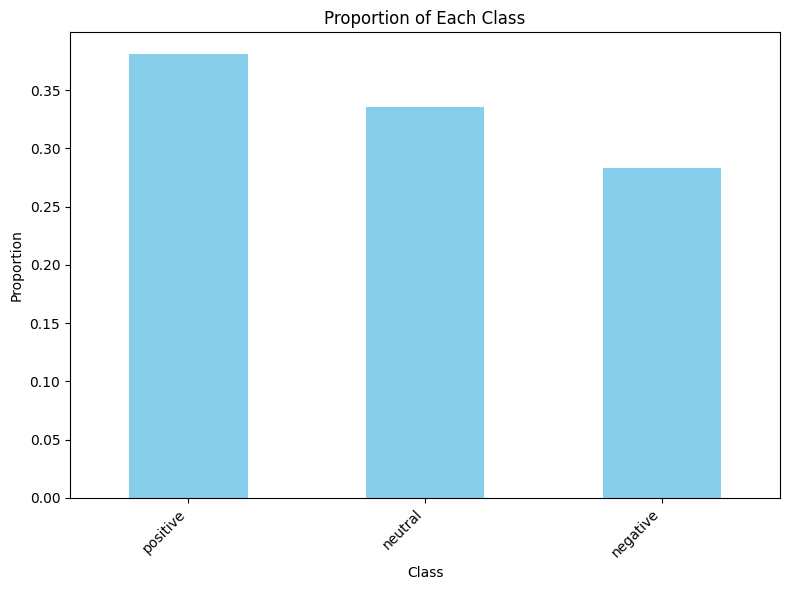

In [48]:
visualize_class_proportions(df_new['rating'])

# Preprocssing:

In [49]:
import re
from string import punctuation

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [78]:
df_new['reviews'].values[0]

'a lot of problems with the Qwiklabs... '

In [80]:
df_new['reviews'].values[8]

"This course could be a nice introduction and overview of the Machine Learning field.However, the video transcripts are TERRIBLE — do not attempt to find any traces of grammar in them !  After a while I figured there were lecture notes (seriously, why hiding them under Resources ??? some people don't want to or simply can't watch the videos), but some of them lack information needed for the quiz so for some sessions you still have to watch the videos or endure the transcripts anyway.But MOST OF ALL, the course has an incredible number of (acknowledged) errors, sometimes critical for the programming assignments, and you have to dig into the forum and Resources Erratas to figure them.  Given that this lecture has been online at least since 4 years and some people actually PAY FOR IT, I find this utterly disrespectful, hence my low rating.Furthermore, note that the validation script for ex5 is too permissive : it accepts wrong linearRegCostFunction implementations, which makes the second 

In [81]:
df_new['reviews'].values[150]

'Good course for beginners, but those with higher levels of nutrition knowledge will likely: 1. Find it way too easy; 2. Find that the recipes actually contain rather unhealthy ingredients (e.g., always avoid butter--too unhealthy); and 3. Find the lack of vegetarian, vegan, low-carb, and other diet-lifestyles discouraging. '

In [84]:
df_new['reviews'].values[400]

'good course. Loved it.'

In [69]:
import emoji

# Define a function to replace emojis with descriptive text
def replace_emojis_with_text(text):
    # Use the emoji library's `demojize` function to replace emojis with text
    # The `demojize` function returns a string where emojis are replaced with their short names
    # surrounded by colons, e.g., ":smile:", ":heart:", etc.
    # You can then remove the colons or customize the output to suit your needs
    return emoji.demojize(text, delimiters=("", ""))


In [85]:
df_new['reviews'] = df_new['reviews'].apply(replace_emojis_with_text)

In [72]:
import re
from string import punctuation

def clean_text(series):
    series = series.apply(lambda x:  re.sub(r'_+', ' ', x))

    series = series.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
    
    series = series.str.lower()
    
    series = series.apply(lambda x: ''.join([c for c in x if c not in punctuation]))
    
    # remove numbers
    series = series.apply(lambda x: re.sub(r'\d+', '', x))
    
    # remove extra whitespaces
    series = series.str.strip()
    
    # remove extra whitespaces
    series = series.apply(lambda x: re.sub(' +', ' ', x))
    
    return series

In [86]:
df_new['reviews']=clean_text(df_new['reviews'])

In [89]:
df_new['reviews'].values[8]

'course could nice introduction overview machine learn fieldhowever video transcript terrible attempt find trace grammar figure lecture note seriously hide resource people do not want simply can not watch video lack information need quiz session still watch video endure transcript anywaybut course incredible number acknowledge error sometimes critical programming assignment dig forum resource erratas figure give lecture online least since year people actually pay find utterly disrespectful hence low ratingfurthermore note validation script ex permissive accept wrong linearregcostfunction implementation make second part assignment quite painful debug'

In [74]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

In [87]:
df_new['reviews'] = df_new['reviews'].apply(remove_stopwords)

In [90]:
df_new['reviews'].values[8]

'course could nice introduction overview machine learn fieldhowever video transcript terrible attempt find trace grammar figure lecture note seriously hide resource people do not want simply can not watch video lack information need quiz session still watch video endure transcript anywaybut course incredible number acknowledge error sometimes critical programming assignment dig forum resource erratas figure give lecture online least since year people actually pay find utterly disrespectful hence low ratingfurthermore note validation script ex permissive accept wrong linearregcostfunction implementation make second part assignment quite painful debug'

In [76]:
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_text)

In [88]:
df_new['reviews'] = df_new['reviews'].apply(lemmatize_text)

In [94]:
df_new['reviews'].values[11]

'course useful thank'

In [101]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# TextBlob:

In [95]:
from textblob import TextBlob

In [96]:
# Create a function to get the subjectivity:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [97]:
#Create two new columns ‘Subjectivity’ & ‘Polarity’
df_new['TextBlob_Subjectivity'] = df_new['reviews'].apply(getSubjectivity)
df_new['TextBlob_Polarity'] = df_new['reviews'].apply(getPolarity)

In [98]:
df_new.head(10)

,course_name,reviews,rating,TextBlob_Subjectivity,TextBlob_Polarity
0,System Administration and IT Infrastructure Se...,lot problem qwiklab,negative,0.000000,0.000000
1,Chinese for Beginners,great first approach language hope able use soon,positive,0.569444,0.516667
2,Fundamentals of Graphic Design,find material really good easy follow assignme...,neutral,0.472222,0.157639
3,"Applied Plotting, Charting & Data Representati...",fun course welltaught lovely chart,positive,0.475000,0.400000
4,Convolutional Neural Networks in TensorFlow,topic explain brieflythere depth coverage ment...,neutral,0.000000,0.000000
5,Cryptography I,theoretical mathematical enough real example,negative,0.225000,0.050000
6,Applied Data Science Capstone,assignment nice free would like restrict assig...,neutral,0.691071,0.376786
7,Building Scalable Java Microservices with Spri...,many lab stepsnot enough theory,negative,0.500000,0.250000
8,Machine Learning,course could nice introduction overview machin...,negative,0.640293,-0.102564
9,Excel Skills for Business: Essentials,useful course want learn excel basic,positive,0.062500,0.150000


In [103]:
def getScore(polarity):
    if polarity < 0:
        return 'negative'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [104]:
TextBlob_Scores = df_new['TextBlob_Polarity'].apply(getScore)

In [105]:
# find number of accurate predictions
accurate_predictions = accuracy_score(df_new['rating'], TextBlob_Scores)
print("The percentage of accurate predictions is: ", accurate_predictions)

The percentage of accurate predictions is:  0.4664009494166909


In [106]:
# Creating a classification report:
print(classification_report(df_new['rating'], TextBlob_Scores))

              precision    recall  f1-score   support

    negative       0.60      0.34      0.43     12659
     neutral       0.35      0.22      0.27     15000
    positive       0.47      0.78      0.59     17000

    accuracy                           0.47     44659
   macro avg       0.47      0.45      0.43     44659
weighted avg       0.47      0.47      0.44     44659



In [110]:
# Creating a confusion matrix,which compares the y_test and y_pred:
cm = confusion_matrix(df_new['rating'], TextBlob_Scores)

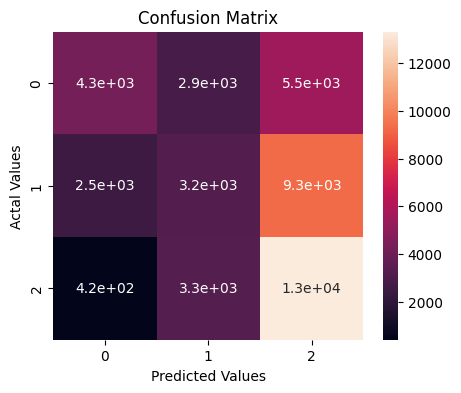

In [111]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# VADER:

In [109]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [112]:
def getVader(text):
    return analyzer.polarity_scores(text)

In [120]:
df_new['vader_dict'] = df_new['reviews'].apply(getVader)

In [121]:
df_new.head(10)

,course_name,reviews,rating,TextBlob_Subjectivity,TextBlob_Polarity,vader_dict
0,System Administration and IT Infrastructure Se...,lot problem qwiklab,negative,0.000000,0.000000,"{'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'comp..."
1,Chinese for Beginners,great first approach language hope able use soon,positive,0.569444,0.516667,"{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'comp..."
2,Fundamentals of Graphic Design,find material really good easy follow assignme...,neutral,0.472222,0.157639,"{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp..."
3,"Applied Plotting, Charting & Data Representati...",fun course welltaught lovely chart,positive,0.475000,0.400000,"{'neg': 0.0, 'neu': 0.297, 'pos': 0.703, 'comp..."
4,Convolutional Neural Networks in TensorFlow,topic explain brieflythere depth coverage ment...,neutral,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,Cryptography I,theoretical mathematical enough real example,negative,0.225000,0.050000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,Applied Data Science Capstone,assignment nice free would like restrict assig...,neutral,0.691071,0.376786,"{'neg': 0.05, 'neu': 0.694, 'pos': 0.256, 'com..."
7,Building Scalable Java Microservices with Spri...,many lab stepsnot enough theory,negative,0.500000,0.250000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
8,Machine Learning,course could nice introduction overview machin...,negative,0.640293,-0.102564,"{'neg': 0.22, 'neu': 0.696, 'pos': 0.084, 'com..."
9,Excel Skills for Business: Essentials,useful course want learn excel basic,positive,0.062500,0.150000,"{'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'comp..."


In [114]:
df_new['vader_dict'][:10]

0    {'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'comp...
1    {'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'comp...
2    {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...
3    {'neg': 0.0, 'neu': 0.297, 'pos': 0.703, 'comp...
4    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.05, 'neu': 0.694, 'pos': 0.256, 'com...
7    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
8    {'neg': 0.22, 'neu': 0.696, 'pos': 0.084, 'com...
9    {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'comp...
Name: vader_dict, dtype: object

In [115]:
df_new['vader_dict'][10]

{'neg': 0.311, 'neu': 0.328, 'pos': 0.361, 'compound': 0.2263}

In [116]:
df_new['vader_dict'][200]

{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.8176}

In [122]:
def getVaderScores (polarity):
    polarity.pop('compound')
    score = max(polarity, key = polarity.get)
    
    if score == 'neg':
        return 'negative'
    elif score == 'neu':
        return 'neutral'
    else:
        return 'positive'

In [123]:
vader_scores = df_new['vader_dict'].apply(getVaderScores)

In [124]:
# find number of accurate predictions
accurate_predictions = accuracy_score(df_new['rating'], vader_scores)
print("The percentage of accurate predictions is: ", accurate_predictions)

The percentage of accurate predictions is:  0.459101189010054


In [125]:
# Creating a classification report:
print(classification_report(df_new['rating'], vader_scores))

              precision    recall  f1-score   support

    negative       0.56      0.07      0.12     12659
     neutral       0.38      0.84      0.52     15000
    positive       0.73      0.41      0.53     17000

    accuracy                           0.46     44659
   macro avg       0.56      0.44      0.39     44659
weighted avg       0.56      0.46      0.41     44659



In [126]:
# Creating a confusion matrix,which compares the y_test and y_pred:
cm = confusion_matrix(df_new['rating'], vader_scores)

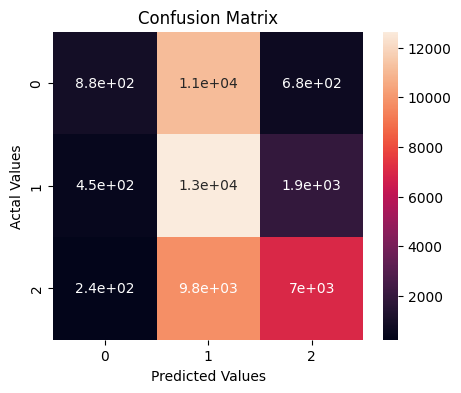

In [127]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# fastText:

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['reviews'],df['rating'],stratify=df['rating'],random_state=42)

In [33]:
# Assuming you have train_df and test_df data frames

# Add the label prefix and combine label and text
X_train['text_with_label'] = '__label__' + y_train + ' ' + X_train
X_test['text_with_label'] = '__label__' + y_test + ' ' + X_test

# Save the data frames to text files
X_train['text_with_label'].to_csv('train.txt', index=False, header=False)
X_test['text_with_label'].to_csv('test.txt', index=False, header=False)


In [34]:
import fasttext
import matplotlib.pyplot as plt

# Define a list to track loss during training
losses = []



# Train a FastText supervised model
model = fasttext.train_supervised(input='train.txt', epoch=100, lr=0.5,dim=100, wordNgrams=3, verbose=2)

# You can print the model summary
print(model)


Read 0M words

Number of words:  20805

Number of labels: 2

Progress:  99.8% words/sec/thread:  594906 lr:  0.000847 avg.loss:  0.095105 ETA:   0h 0m 0s

Progress: 100.0% words/sec/thread:  593365 lr:  0.000000 avg.loss:  0.094973 ETA:   0h 0m 0s


In [35]:
# Evaluate the model's performance on the test data
test_results = model.test('test.txt')

# Print test accuracy
print(f"Test accuracy: {test_results[1]}")


Test accuracy: 0.9206099669863229


In [36]:
# Calculate accuracy on the training data
train_results = model.test('train.txt')

# Print training accuracy
print(f"Training accuracy: {train_results[1]}")


Training accuracy: 0.992349211339936
